In [1]:
# https://qiita.com/msrks/items/e3e958c04a5167575c41#%E4%BD%BF%E3%81%84%E6%96%B9-1-%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB

In [2]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error


In [3]:
boston = load_boston()
X_train, X_test = boston.data[:400], boston.data[400:]
y_train, y_test = boston.target[:400], boston.target[400:]

In [4]:
reg = xgb.XGBRegressor()

In [6]:
# ハイパーパラメータ探索
reg_cv = GridSearchCV(reg, {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, verbose=1)
reg_cv.fit(X_train, y_train)
print(reg_cv.best_params_, reg_cv.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'max_depth': 4, 'n_estimators': 50} 0.696443531312


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.9s finished


In [7]:
reg = xgb.XGBRegressor(**reg_cv.best_params_)
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [8]:
# 学習モデルの評価
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)
print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))

2.05154615469
17.3581721145


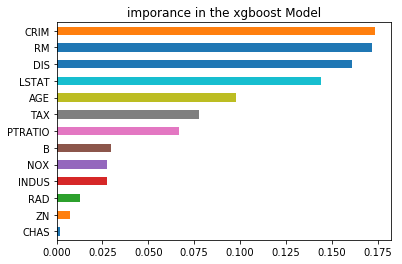

In [9]:
# feature importance のプロット
import pandas as pd
import matplotlib.pyplot as plt
importances = pd.Series(reg.feature_importances_, index = boston.feature_names)
importances = importances.sort_values()
importances.plot(kind = "barh")
plt.title("imporance in the xgboost Model")
plt.show()